In [2]:
# Bandhav Veluri

import cmath
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# Constants

hbar = 1.0546e-34
m0 = 9.1094e-31
eVtoJ = 1.602e-19

(9519851556.560804+0j)
1184380524.6072795j
(9519851556.560804+0j)


<IPython.core.display.Javascript object>


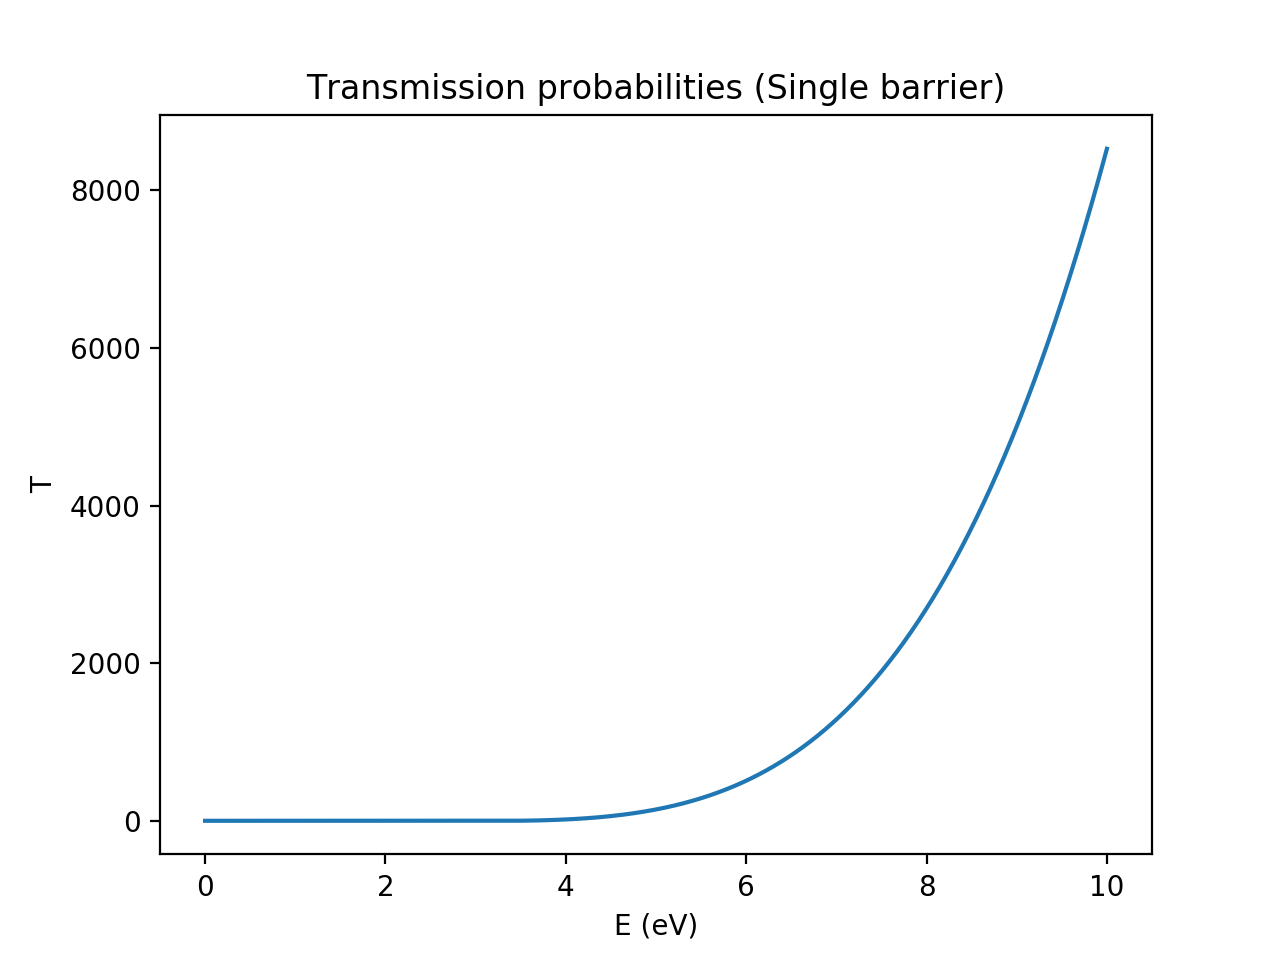

/Users/vb/anaconda3/envs/qc/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Transmission probabilities (Single barrier)')

In [31]:
####################################################
# 2.a
#
# Single barrier transmission probability

def K(E):
    return np.sqrt((2 * m0 * E) / (hbar ** 2))

def T_single_barrier(E, qV0_1, qV0_2, L):
    k = K(E)
    alpha = K((E - qV0_1) * -1)
    beta = K(E + qV0_2)

    alpha_minus_ik = alpha - k * 1j
    alpha_minus_ibeta = alpha - beta * 1j

    return np.absolute(16 * (alpha**2) * (k**2) * np.exp(-2*alpha*L) / \
            ((alpha_minus_ik * alpha_minus_ibeta) ** 2))

L = 1.4e-9
qV0_1 = 3.4 * eVtoJ
qV0_2 = 0.0 * eVtoJ
E = np.linspace(0, 10, num=1000, dtype=complex) * eVtoJ
T = T_single_barrier(E, qV0_1, qV0_2, L)

plt.figure()
plt.plot(E / eVtoJ, T)
plt.xlabel('E (eV)')
plt.ylabel('T')
plt.title('Transmission probabilities (Single barrier)')

In [ ]:
# 9